In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
# install from command line before opening jupyter notebook as 'pip install citipy'
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [3]:
# create url for query with metric units and city at the end
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "metric"
query_url = f"{url}&appid={api_key}&units={unit}&q="

# lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")
        

City processed: narasapur
City NOT found: vaitupu
City NOT found: mrirt
City processed: yumen
City processed: houston
City processed: hilo
City processed: thompson
City processed: jamestown
City processed: anadyr
City processed: alice springs
City processed: porto novo
City processed: yellowknife
City NOT found: attawapiskat
City processed: rawson
City processed: khatanga
City processed: nalut
City processed: albany
City processed: east london
City processed: punta arenas
City NOT found: amderma
City processed: airai
City processed: vaini
City NOT found: marv dasht
City processed: port elizabeth
City processed: podosinovets
City processed: aktas
City processed: banjar
City processed: busselton
City processed: mataura
City processed: sao joao da barra
City processed: lebu
City processed: bluff
City processed: vardo
City processed: rikitea
City processed: santa cruz
City processed: saint-joseph
City processed: bow island
City processed: inhambane
City processed: tiksi
City processed: vic

In [4]:
# create weather dataframe 

Weather_DF = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

In [5]:
# Windows desktop path
Weather_DF.to_csv(r'/Bootcamp-Folder/API-Challenge/output_data/cities.csv', index = False)

Weather_DF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,narasapur,IN,32.10,57,42,4.44,16.4500,81.6667,1663134408
1,yumen,CN,26.19,20,2,4.06,40.2833,97.2000,1663134409
2,houston,US,26.06,77,75,3.09,29.7633,-95.3633,1663134410
3,hilo,US,24.85,86,40,3.09,19.7297,-155.0900,1663134410
4,thompson,CA,0.09,93,0,1.03,55.7435,-97.8558,1663134411
...,...,...,...,...,...,...,...,...,...
570,otane,NZ,7.78,92,75,2.50,-39.8833,176.6333,1663134633
571,havoysund,NO,6.13,63,91,2.09,70.9963,24.6622,1663134633
572,emporia,US,20.11,56,0,4.63,38.4039,-96.1817,1663134633
573,ellensburg,US,17.43,70,0,8.75,46.9965,-120.5479,1663134634


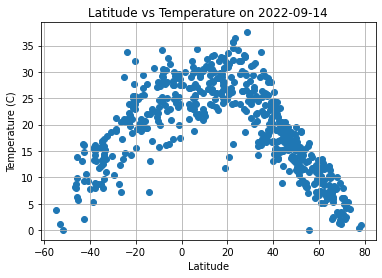

In [6]:
# Create Temperature (C) vs. Latitude scatter plot

# format the max date in the dataset as "runDate" for graph titles
endRunDate = Weather_DF["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

# set data to plot
x = Weather_DF["Latitude"]
y = Weather_DF["Temperature"]
plt.scatter(x,y)
# add gridlines
plt.grid()
# add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
# export as png
plt.savefig(f'../output_data/Latitude vs Temperature on {runDate}.png')
# display plot!
plt.show()

# this plot is tracking the temperature vs latitude for the whole planet - as you can see temperature increases towards the equator and decreases towards the poles 

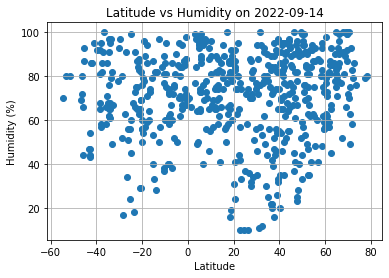

In [7]:
# Latitude vs. Humidity Plot

# set data to plot; retain Latitude from previous plot as "x"
h = Weather_DF["Humidity"]
plt.scatter(x,h)
plt.title(f"Latitude vs Humidity on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(f'../output_data/Latitude vs Humidity on {runDate}.png')
plt.show()

# this plot tracks the relative humiditiy - in general the humidity seems to be higher in the norther hemisphere but this may be due to the random sample of data

<function matplotlib.pyplot.show(close=None, block=None)>

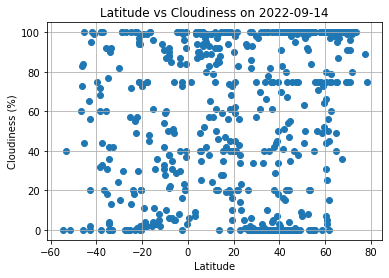

In [8]:
# Latitude vs. Cloudiness Plot

# set data to plot
c = Weather_DF["Cloudiness"]
plt.scatter(x,c)
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'../output_data/Latitude vs Cloudiness on {runDate}.png')
plt.show

# this plot tracks cloud cover - there is no association with cloud cover vs latitude

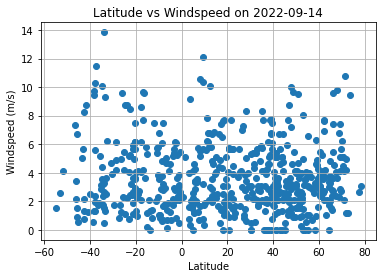

In [9]:
# Latitude vs. Wind Speed Plot

# set data to plot
ws = Weather_DF["Windspeed"]
plt.scatter(x,ws)
plt.title(f"Latitude vs Windspeed on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (m/s)")
plt.savefig(f'../output_data/Latitude vs Windspeed on {runDate}.png')
plt.show()

# In this plot we tracked wind speed vs latitude - we can see that wind speed has no relation to laitiude as the data is evenly spread. 

In [10]:
# Create Northern and Southern Hemisphere DataFrames

Northern_DF = Weather_DF.loc[Weather_DF["Latitude"] > 0]
Southern_DF = Weather_DF.loc[Weather_DF["Latitude"] < 0]

In [11]:
# function to call is "linearRegression"
# variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

The r-square is -0.8550101006453135
y = -0.38x + 33.64


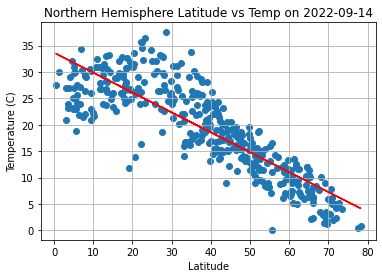

In [12]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

# set the data sets to compare
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Temperature"]
# tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
# label the y axis
y_label = "Temperature (C)"
# give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
# run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
# save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()


# the linear regression in this plot shows that as we move away from the equator to the norther hemisphere temperature gets lower in a consistent manner

The r-square is 0.7858574154073408
y = 0.42x + 28.86


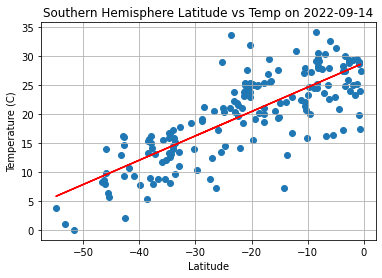

In [13]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (C)"
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

# the linear regression in this plot shows that as we move away from the equator to the southern hemisphere temperature gets lower in a consistent manner

The r-square is 0.09558003127002143
y = 0.1x + 67.44


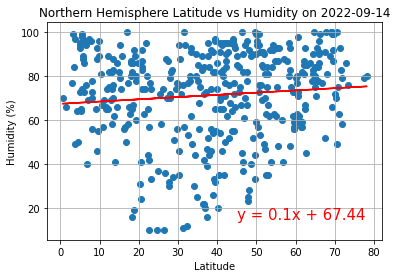

In [14]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

# linear regression shows that there is no real relation in latitude to humidity 

The r-square is -0.0012454704894921999
y = -0.0x + 70.16


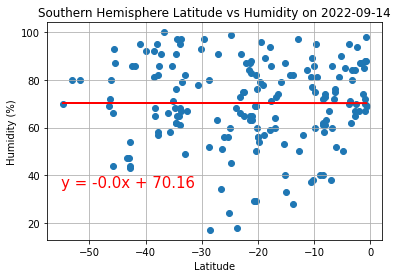

In [15]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

# linear regression shows that there is no real relation in latitude to humidity 

The r-square is 0.1524813758966785
y = 0.31x + 46.71


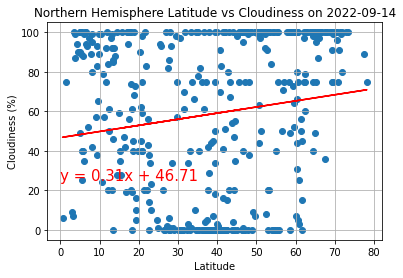

In [16]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

# This plot shows that there is a slight increase in cloudiness towards the north pole but it is not statistically significant

The r-square is 0.07595526124978684
y = 0.2x + 51.39


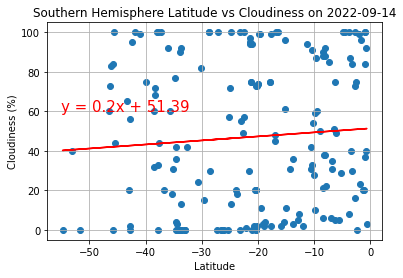

In [17]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

# This plot shows that there is a slight decrease in cloudiness towards the south pole but it is not statistically significant

The r-square is 0.007654979822875308
y = 0.0x + 3.46


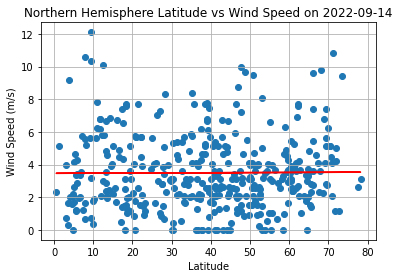

In [18]:
# Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (m/s)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

# this shows that there is no significant varience in wind speed in relation to latitude in the northern hemisphere 

The r-square is -0.10923633746350289
y = -0.02x + 3.36


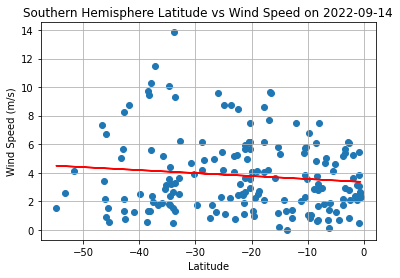

In [19]:
# Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Windspeed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Wind Speed (m/s)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

# this shows that there is no significant varience in wind speed in relation to latitude in the southern hemisphere 